# Dataset Overview:

- The dataset "Bank Marketing" contains information about direct marketing campaigns of a Portuguese banking institution. The dataset can be accessed through the following link: https://archive.ics.uci.edu/dataset/222/bank+marketing.
- From the zip file **bank-full.csv** file is used.
- The dataset includes Job, Education, Defalut, Hosuing Loan, Personal Loan and many other features.

- In the given dataset, there are a total 17 columns out of which 16 are features and 1 is the target variable.

**Feature Variables:**
- age: Age of the customer
- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: contains primary, secondary and tertiary
- default: has credit in default?
- balance: average yearly balance
- housing: has housing loan?
- loan: has personal loan?
- contact: contact communication type (categorical: 'cellular','telephone')
- day: last contact day of the week
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign:	number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays:number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','success')

**Taregt Variables:**
- y: has the client subscribed a term deposit?

# Problem Domain:

- Banco de Portugal faces challenges in optimizing its marketing campaigns for term deposit subscriptions. The bank's traditional marketing efforts, such as phone call campaigns, often lead to low conversion rates of customers opting for term deposits. This has been a cause of concern for Banco de Portugal. Hence, this research is conducted to predict customer subscription to Term Deposits using Machine Learning algorithm.

# 1. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

# 2. Load the Dataset

- The loading of a dataset refers to importing data into a programming environment for the analysis. To load the CSV data, we use the read_csv() function of the pandas library.
- The function head() displays the first 5 records of the imported dataframe. Alternatively, we can use the sample() function which displays random 5 records from the dataframe.

In [2]:
# Load dataset
df = pd.read_csv('bank-full.csv')

# Display dataframe
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


- The info() is a method of the pandas library and it provides a concise summary of a DataFrame. It helps in understanding the structure of the dataset, such as the number of null-values in each column, the data type of each column, and the memory usage by the created dataframe.

In [3]:
# Infomation about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- The below function of the pandas library is useful to check the number of missing values in the dataframe. From this it is analyzed that the dataset doesn't contain any missing values.

In [4]:
# Checking for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- The below function is useful to count the number of duplicate records in the dataframe. From this it is observed that the taken dataset does not contain duplicate records.

In [5]:
# Checking for duplicate values
df.duplicated().sum()

0

- The describe() function of the pandas library provides summary statistics for numerical columns of the dataframe.
- This fucntion contains some key metrics such as Count, Mean, Std, Min, 25%, 50%, 75% and Max. 

In [6]:
# Describe dataframe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# 3. Exploratory Data Analysis(EDA)

- Exploratory Data Analysis (EDA) is crucial in Machine Learning because it helps in understanding the dataset before model building. It identifies patterns, detects missing or inconsistent data, and uncovers relationships between variables. Proper EDA ensures better feature selection, improves model performance, and prevents errors like data leakage or biased predictions.

### a. Distribution of Subscription

- The pie chart below shows the distribution of customer subscription to term deposit, showing that 88.3% of customers didn't subscribe, while only 11.7% subscribed. From this, it is observed that data is highly imbalanced with more 'no' responses than 'yes'. To handle this in further practical SMOTE analysis is applied.

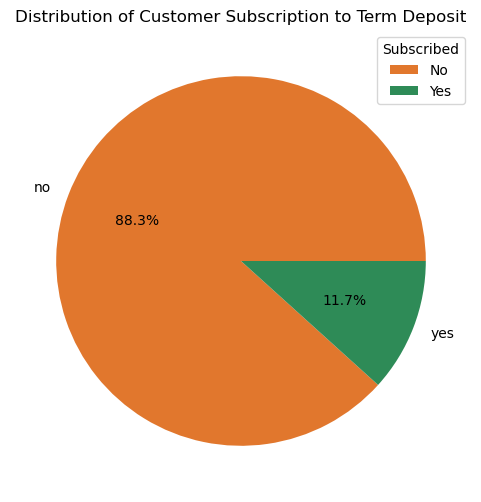

In [7]:
# Distribution of subscription
y_count = df['y'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(y_count.values, labels=y_count.index, autopct='%1.1f%%', colors=['#E1772D', 'seagreen'])
plt.title("Distribution of Customer Subscription to Term Deposit")
plt.legend(title="Subscribed", labels=['No', 'Yes'])
plt.show()

- The below code is useful to add the ratio lable in bar chart for easy understanding and interpretation.

In [8]:
# Add ratio labels on top of each bar for categorical features
def plot_label_ratio_cat(plot, x_col):
    # Get the unique categories for x_col
    categories = df[x_col].unique()
    group_totals = df[x_col].value_counts()
    
    for ax in plot.patches:
        height = ax.get_height()
        x_index = int(round(ax.get_x()))
        category = categories[x_index]
        total_count = group_totals[category]
        
        # Calculate the ratio
        if total_count > 0 and height > 0:
            plot.text(
                ax.get_x() + ax.get_width() / 2, 
                height, 
                f'{(height / total_count)*100:.2f}%', 
                ha='center', 
                va='bottom', 
                fontsize=12, 
            )

### b. Distribution of Job by Subscription

- The bar chart below shows the distribution of job categories by subscription to term deposits. From this, it is observed that Students with 28.68% and Retired with 22.79% have the highest subscription rates (yes). On the other side blue-collar jobs and services have the lowest subscription rates (yes).
- So, the bank should focus marketing campaigns on students and retirees, as they show higher conversion rates. To improve the engagement among blue-collar and service workers might need more efforts.

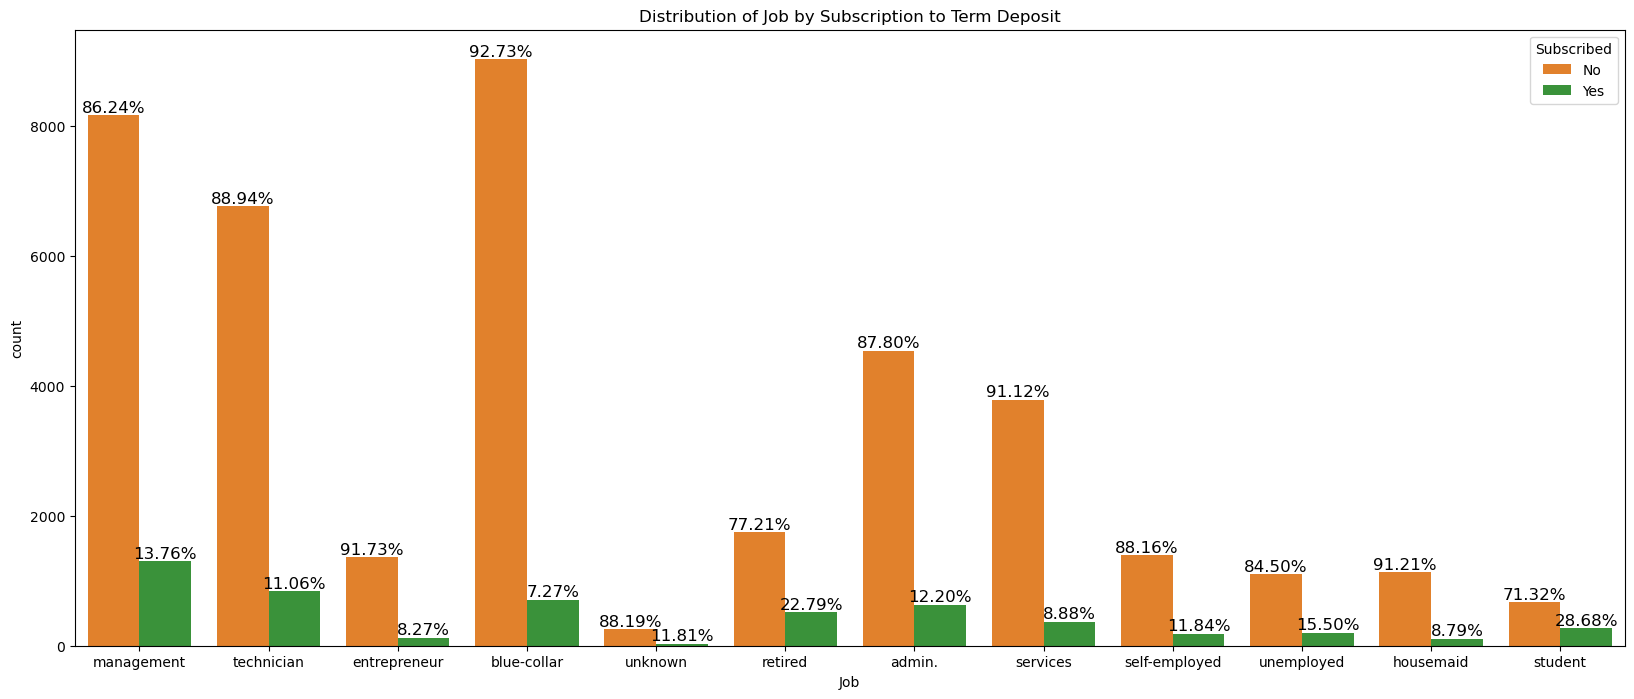

In [9]:
# Distribution of Job by Subscription
plt.figure(figsize=(20,8))
ax = sns.countplot(df, x='job', hue='y', palette={'yes': '#2ca02c', 'no': '#ff7f0e'})
plot_label_ratio_cat(ax, 'job')
plt.title("Distribution of Job by Subscription to Term Deposit")
plt.xlabel("Job")
plt.legend(title="Subscribed", labels=['No', 'Yes'])
plt.show()

### c. Distribution of Marital Status by Subscription to Term Deposit

- The bar chart below shows the distribution of marital status by subscription to the term deposits. From this, it is observed that across all marital status most customers didn't subscribe. Still, the single customer has the highest chances of subscription (14.95%) followed by married and divorced.
- Since single customers have the highest likelihood of subscribing, marketing campaigns could be better tailored toward them. The maximum number of customers is observed in the married category, so improving conversion rate in this category directly increases overall subscriptions.

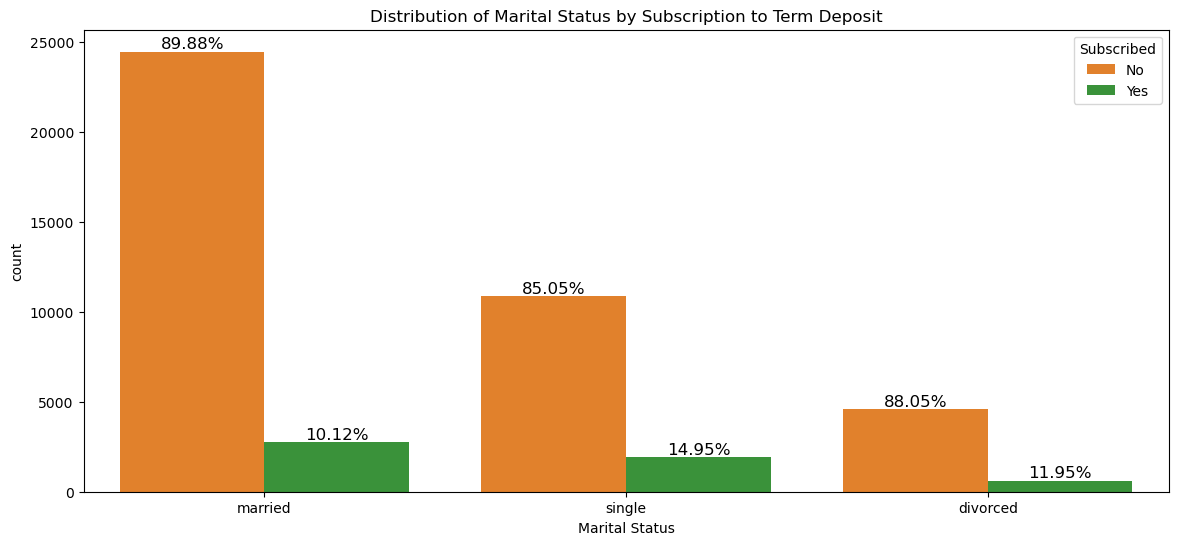

In [10]:
# Distribution of Marital Status by Subscription
plt.figure(figsize=(14,6))
ax = sns.countplot(df, x='marital', hue='y', palette={'yes': '#2ca02c', 'no': '#ff7f0e'})
plot_label_ratio_cat(ax, 'marital')
plt.title("Distribution of Marital Status by Subscription to Term Deposit")
plt.xlabel("Marital Status")
plt.legend(title="Subscribed", labels=['No', 'Yes'])
plt.show()

### d. Distribution of Education by Subscription to Term Deposit

- The bar chart below shows the distribution of education by subscription to term deposit. From this, it is observed that higher education level shows higher subscription rates, while lower education level shows lower subscription rates. Also, the majority of the customers, regardless of education level, don't subscribe to term deposite.
- Banks may consider targeting marketing campaigns toward individuals with tertiary education, as they are more likely to subscribe.

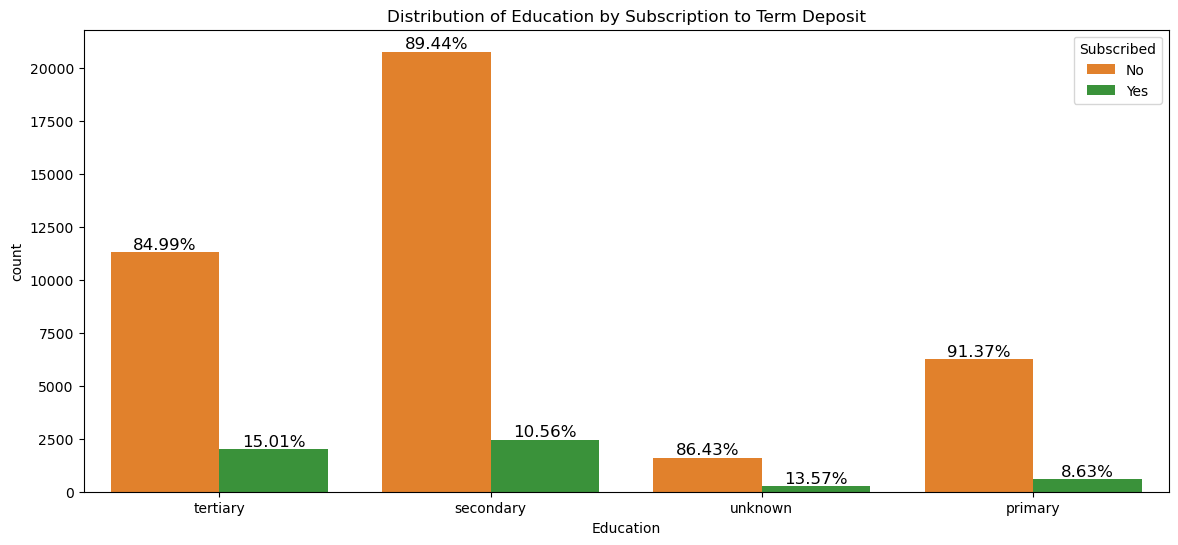

In [11]:
# Distribution of Education by Subscription
plt.figure(figsize=(14,6))
ax = sns.countplot(df, x='education', hue='y', palette={'yes': '#2ca02c', 'no': '#ff7f0e'})
plot_label_ratio_cat(ax, 'education')
plt.title("Distribution of Education by Subscription to Term Deposit")
plt.xlabel("Education")
plt.legend(title="Subscribed", labels=['No', 'Yes'])
plt.show()

### e. Distribution of Default by Subscription to Term Deposit

- The bar chart below shows the distribution of defaults by subscription to a term deposit. From this it is analyzed that customers without defaults are more likely to subscribe to a term deposit. The majority (88.20%) still did not subscribe, but the subscription rate is significantly higher than among defaulters.
- Banks should focus on non-defaulters when marketing term deposit products since they are more likely to subscribe.

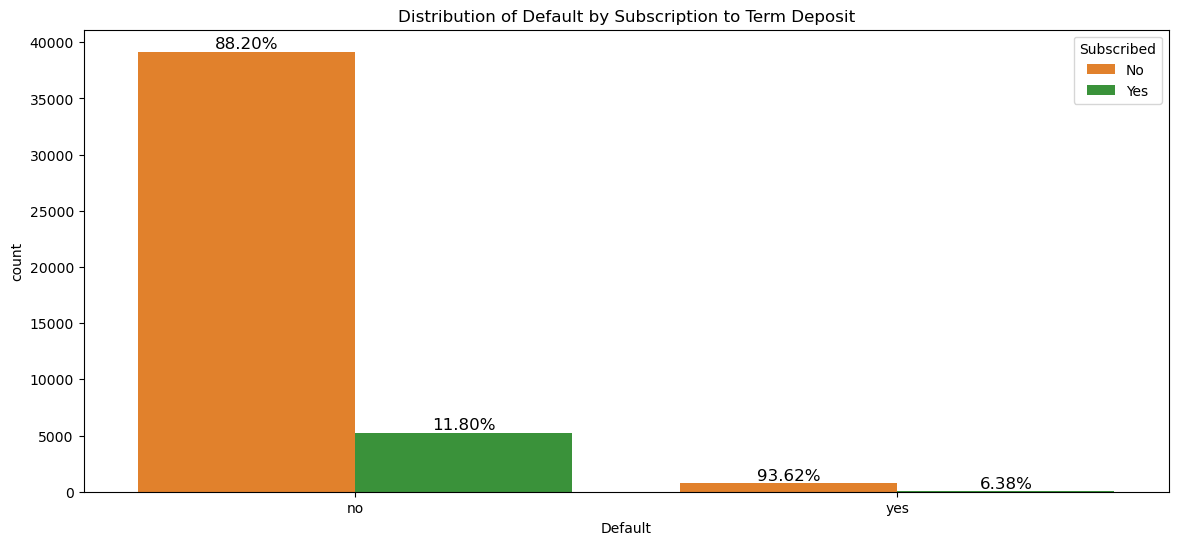

In [12]:
# Distribution of Default by Subscription
plt.figure(figsize=(14,6))
ax = sns.countplot(df, x='default', hue='y', palette={'yes': '#2ca02c', 'no': '#ff7f0e'})
plot_label_ratio_cat(ax, 'default')
plt.title("Distribution of Default by Subscription to Term Deposit")
plt.xlabel("Default")
plt.legend(title="Subscribed", labels=['No', 'Yes'])
plt.show()

### f. Distribution of Housing Loan by Subscription to Term Deposit

- The bar chart below shows the distribution of housing loans by subscription to Term Deposit. From this, it is observed that customers without home loans are more likely to subscribe to a term deposit.
- Banks should target individuals without housing loans for term deposit marketing, as they are more likely to subscribe.

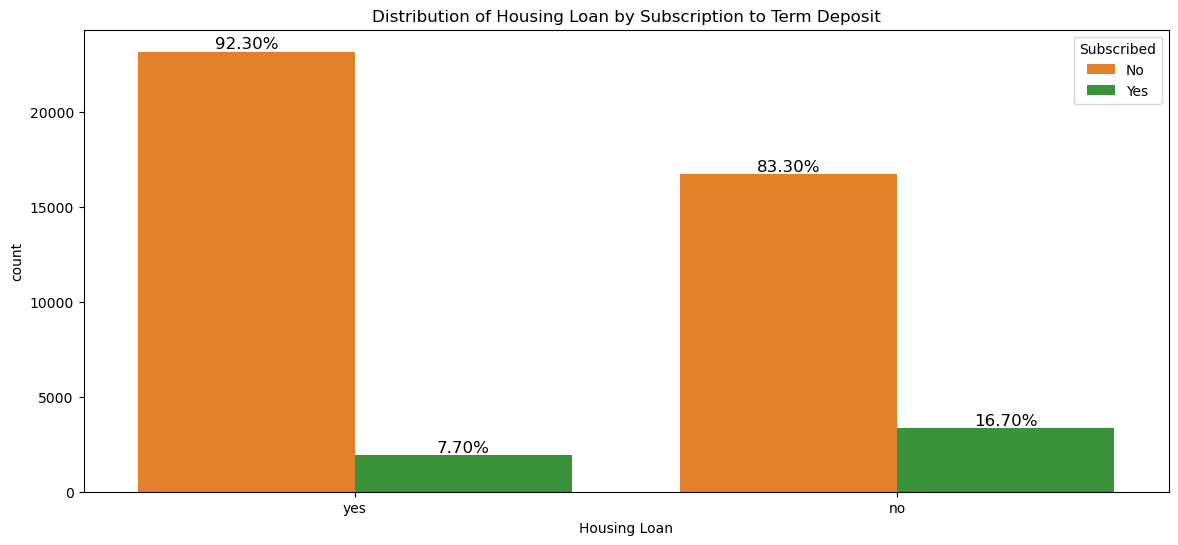

In [13]:
# Distribution of Housing Loan by Subscription
plt.figure(figsize=(14,6))
ax = sns.countplot(df, x='housing', hue='y', palette={'yes': '#2ca02c', 'no': '#ff7f0e'})
plot_label_ratio_cat(ax, 'housing')
plt.title("Distribution of Housing Loan by Subscription to Term Deposit")
plt.xlabel("Housing Loan")
plt.legend(title="Subscribed", labels=['No', 'Yes'])
plt.show()

### g. Distribution of Personal Loan by Subscription to Term Deposit

- The bar chart below shows the distribution of personal loans by subscription to Term Deposit. From this, it is observed that customers without personal loans are more likely to subscribe to a term deposit.
- Banks should target individuals without personal loans for term deposit marketing, as they are more likely to subscribe.

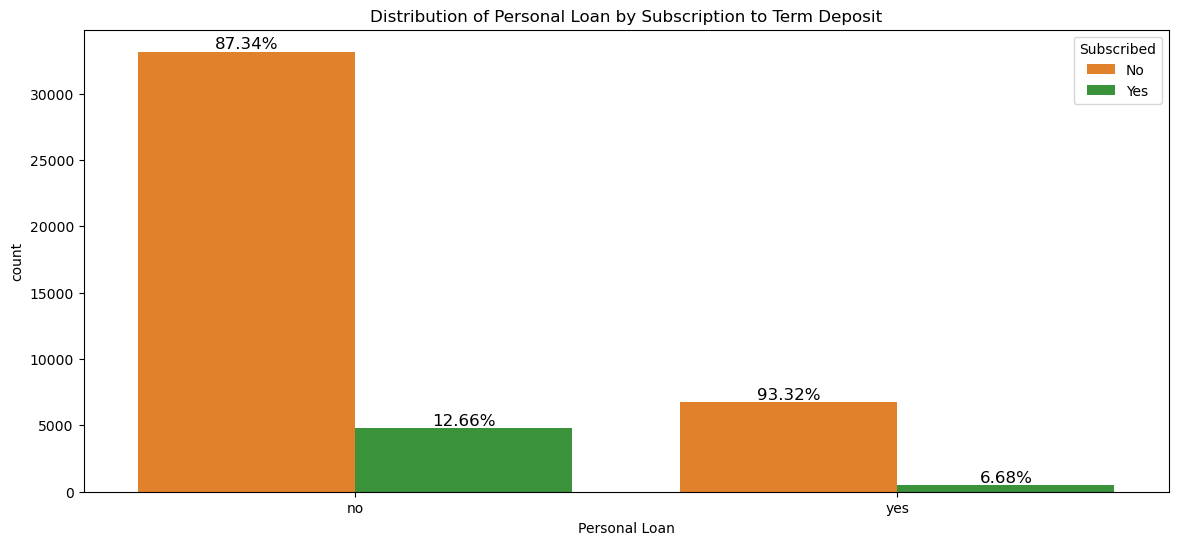

In [14]:
# Distribution of Personal Loan by Subscription
plt.figure(figsize=(14,6))
ax = sns.countplot(df, x='loan', hue='y', palette={'yes': '#2ca02c', 'no': '#ff7f0e'})
plot_label_ratio_cat(ax, 'loan')
plt.title("Distribution of Personal Loan by Subscription to Term Deposit")
plt.xlabel("Personal Loan")
plt.legend(title="Subscribed", labels=['No', 'Yes'])
plt.show()

### h. Distribution of Contact Type by Subscription to Term Deposit

- The bar chart below shows the distribution of contact type by subscription to Term Deposit. From this, it is observed that cellular contacts have a higher subscription rate compared to telephone. Among customers contacted via cellular phones, 14.92% subscribed to the term deposit, while using the telephone only 13.42% subscribed.
- Cellular contact should be prioritized in marketing campaigns since it yields the highest subscription rate.
Telephone contact can still be effective, but it performs slightly worse than cellular.

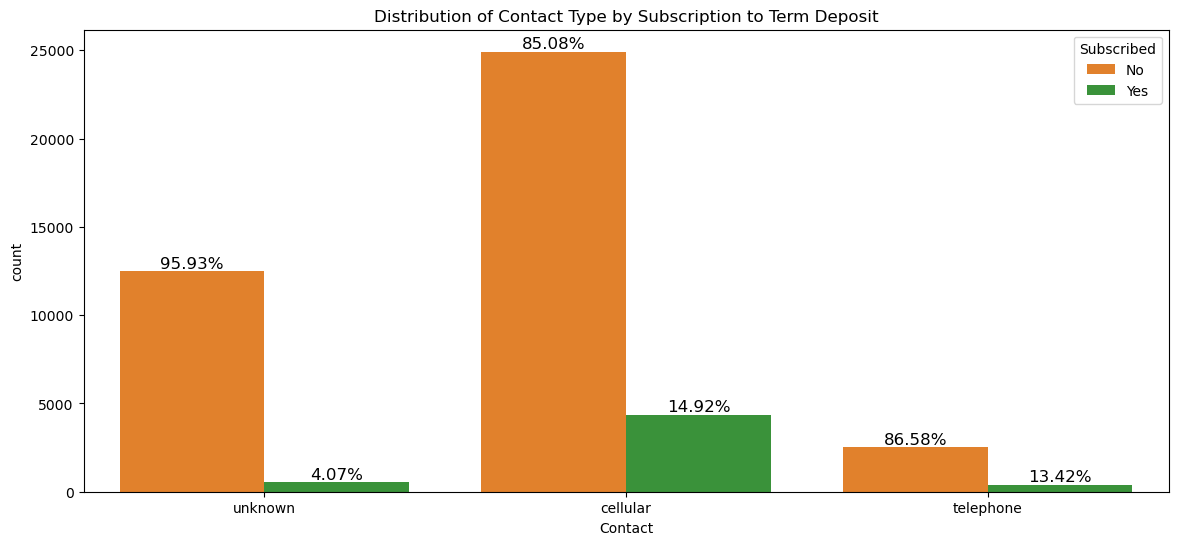

In [15]:
# Distribution of Contact Type by Subscription
plt.figure(figsize=(14,6))
ax = sns.countplot(df, x='contact', hue='y', palette={'yes': '#2ca02c', 'no': '#ff7f0e'})
plot_label_ratio_cat(ax, 'contact')
plt.title("Distribution of Contact Type by Subscription to Term Deposit")
plt.xlabel("Contact")
plt.legend(title="Subscribed", labels=['No', 'Yes'])
plt.show()

### i. Distribution of Age by Subscription to Term Deposit before Outlier Handling

- The hisogram below shows the distribution of age by subscription to term deposite before handling outliers in age. From this it is analyzed that subscription rate is higher in 30 to 45 age group. This suggests that customers in this age range are more likely to subscribe to term deposits, possibly because they have stable incomes and financial planning goals.
- Marketing efforts should target customers aged 30-50, as they are more likely to subscribe.
- Younger customers (under 25) may need different financial products such as short-term savings plans or student-targeted offers.
- Older customers (above 60) might need retirement-focused financial solutions rather than term deposits.

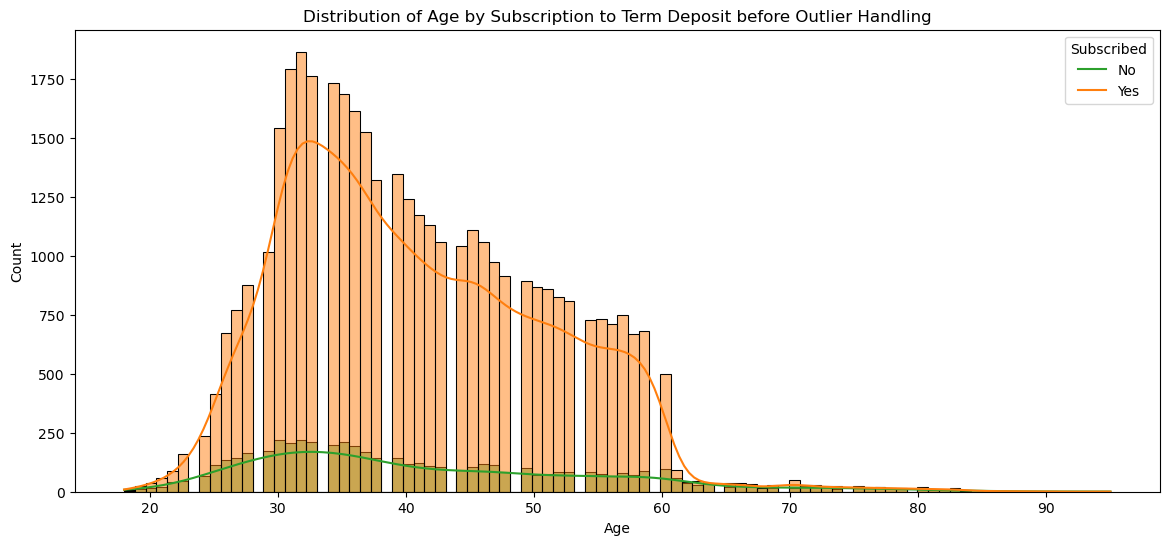

In [16]:
# Distribution of Age by Subscription before Outlier Handling
plt.figure(figsize=(14,6))
sns.histplot(x=df['age'], hue=df['y'], kde=True, palette={'yes': '#2ca02c', 'no': '#ff7f0e'})
plt.title("Distribution of Age by Subscription to Term Deposit before Outlier Handling")
plt.xlabel("Age")
plt.legend(title="Subscribed", labels=['No', 'Yes'])
plt.show()

# 4. Pre-Processing

- Preprocessing in machine learning involves cleaning and transforming raw data into a suitable format for modeling. It includes handling missing values, encoding categorical columns, removing outliers, feature engineering and selection with the data splitting. Proper preprocessing improves model performance and ensures meaningful insights.

## a. Outlier Detection & Handling

- The box plot below is useful to detect the outlier in age. From this, it is observed that above 70 years all are outliers.

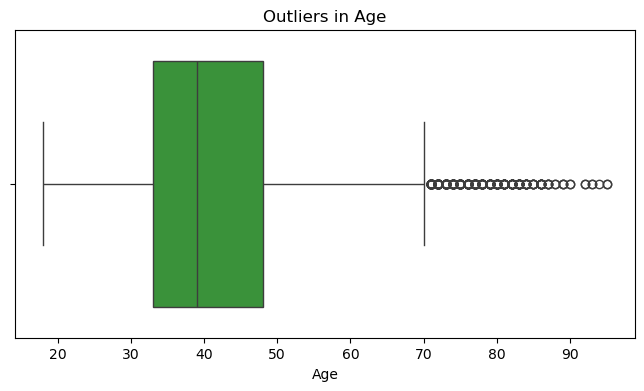

In [17]:
# Box plot for age
plt.figure(figsize=(8,4))
sns.boxplot(x = df['age'], palette={'#2ca02c'})
plt.title("Outliers in Age")
plt.xlabel("Age")
plt.show()

- The function remove_outliers() is used to remove the outliers from the dataset.

In [18]:
# Function to remove outlier
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

- In the below code, outliers are removed from the age, and then reset the index because when we remove the outliers, some indices are missing. So need to reset the index in sequntial manner.

In [19]:
# Remove outliers from age
df = remove_outliers(df, 'age')

# Reset the index of dataframe
df.reset_index(drop=True, inplace=True)

- The histogram below shows the distribution of age after outlier handing.

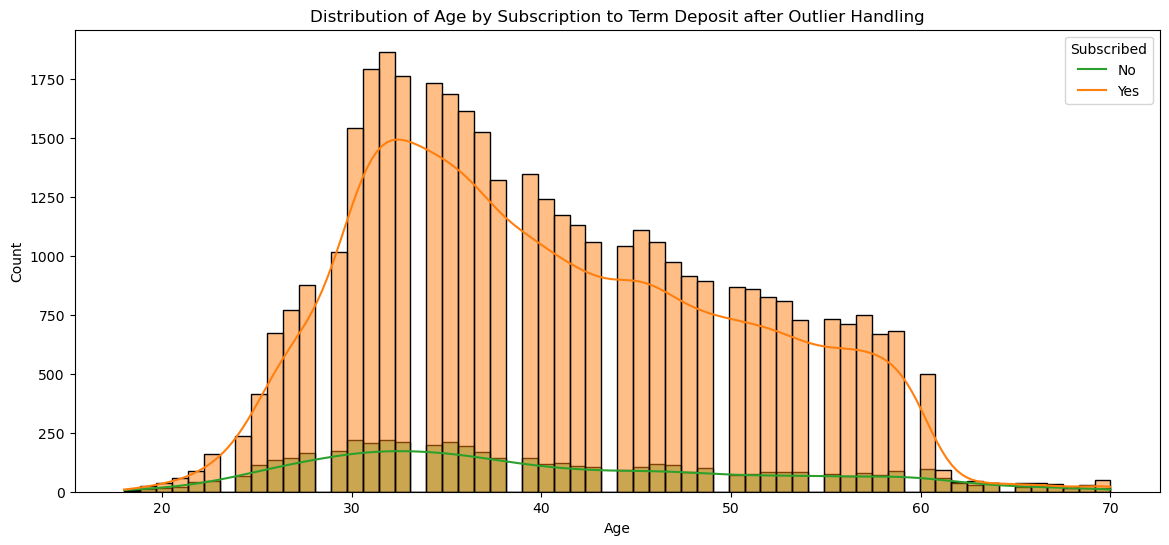

In [20]:
# Distribution of Age by Subscription after Outlier Handling
plt.figure(figsize=(14,6))
sns.histplot(x=df['age'], hue=df['y'], kde=True, palette={'yes': '#2ca02c', 'no': '#ff7f0e'})
plt.title("Distribution of Age by Subscription to Term Deposit after Outlier Handling")
plt.xlabel("Age")
plt.legend(title="Subscribed", labels=['No', 'Yes'])
plt.show()

## b. Feature Engineering

- In the below cell convert categorical target variable into numeric value using map function of pandas.

In [21]:
# Convert target variabl into numeric value
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['y'].value_counts()

y
0    39653
1     5071
Name: count, dtype: int64

### i. Feature Selection

- Here, the correlation between the numeric features is observed using the corr() function of Pandas. From this, it is observed that only duration and pdays are highly corelated with the target variable(y). So, we ignore other features while training the model.

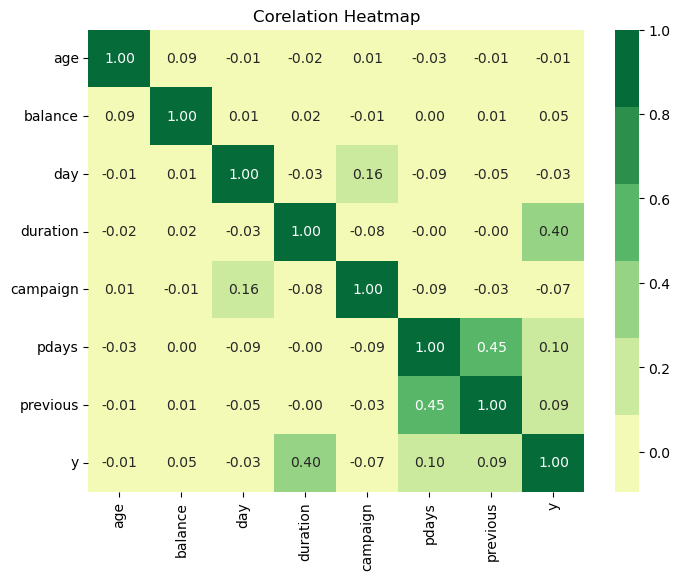

In [22]:
# Corelation Heatmap
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(correlation, cmap=sns.color_palette("YlGn"), annot=True, fmt=".2f")
plt.title("Corelation Heatmap")
plt.show()

### ii. Encode Categorical Features

- In the below code 1st create list of categorical columns then apply lable encoding on all the categorical columns to convert it into numeric columns.

In [23]:
# Select categorical columns
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Apply lable encoding
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

## c. Data Splitting

- In the below code, select the feature and target variables. Then apply train_test_split() to split the data into a training and testing set. Here, training set conatin 80% data and testing set conatins 20% data.
- Data splitting is important to evaluate the model's performance on unseen data to prevent overfitting. It ensures the model generalizes well by using separate training and testing sets.

In [24]:
# Separate out Feature and Target variables
X = df.drop(columns=['y','age', 'balance', 'day', 'campaign', 'previous'])
y = df['y']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# 5. Model Training:

- Model training is the process of feeding a machine learning algorithm with training data to learn patterns and relationships. The model adjusts its parameters to minimize errors and improve accuracy. This step is crucial for making reliable predictions on new, unseen data.

## a. Logistic Regression

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7939
           1       0.59      0.20      0.30      1006

    accuracy                           0.89      8945
   macro avg       0.75      0.59      0.62      8945
weighted avg       0.87      0.89      0.87      8945



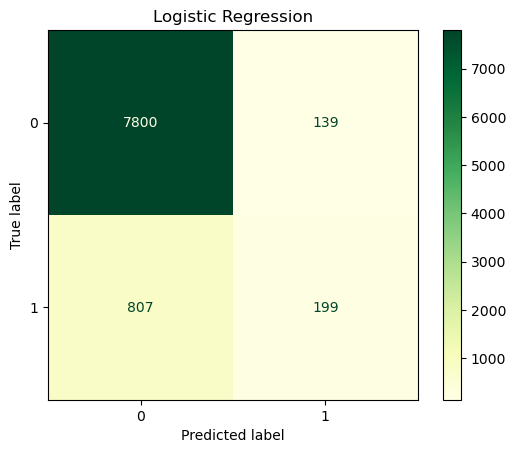

In [25]:
# Apply Logistic Regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Classification report
lr_acc = classification_report(y_test, lr_pred)
print(lr_acc)

# Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm)
disp.plot(cmap="YlGn", colorbar=True)
plt.title('Logistic Regression')
plt.show()

## b. Decision Tree

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7939
           1       0.46      0.46      0.46      1006

    accuracy                           0.88      8945
   macro avg       0.70      0.70      0.70      8945
weighted avg       0.88      0.88      0.88      8945



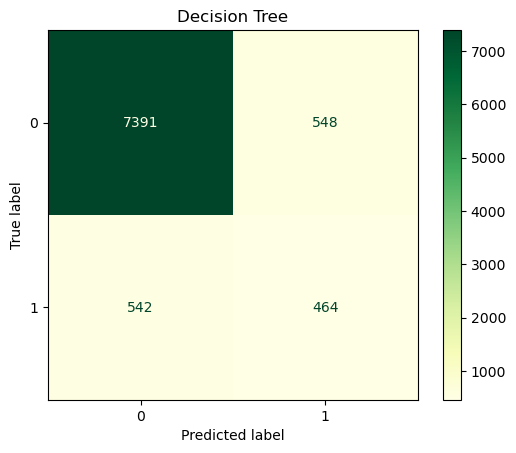

In [26]:
# Apply Decision Tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Classification report
dt_acc = classification_report(y_test, dt_pred)
print(dt_acc)

# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm)
disp.plot(cmap="YlGn", colorbar=True)
plt.title('Decision Tree')
plt.show()

## c. Gradient Boosting

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7939
           1       0.66      0.40      0.50      1006

    accuracy                           0.91      8945
   macro avg       0.80      0.69      0.72      8945
weighted avg       0.90      0.91      0.90      8945



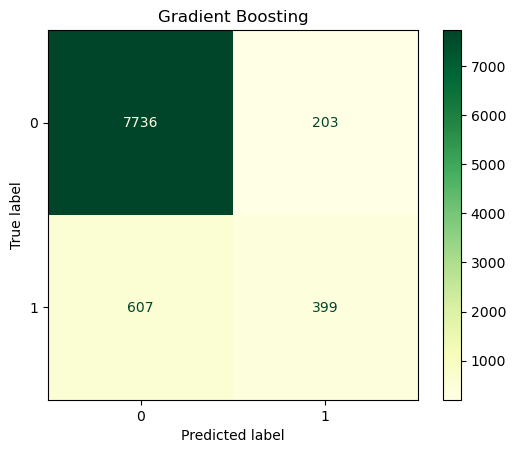

In [27]:
# Apply Gradient Boosting
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

# Classification report
gb_acc = classification_report(y_test, gb_pred)
print(gb_acc)

# Confusion Matrix
gb_cm = confusion_matrix(y_test, gb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=gb_cm)
disp.plot(cmap="YlGn", colorbar=True)
plt.title('Gradient Boosting')
plt.show()

## d. Multi Layer Perceptron

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      7939
           1       0.45      0.62      0.52      1006

    accuracy                           0.87      8945
   macro avg       0.70      0.76      0.72      8945
weighted avg       0.89      0.87      0.88      8945



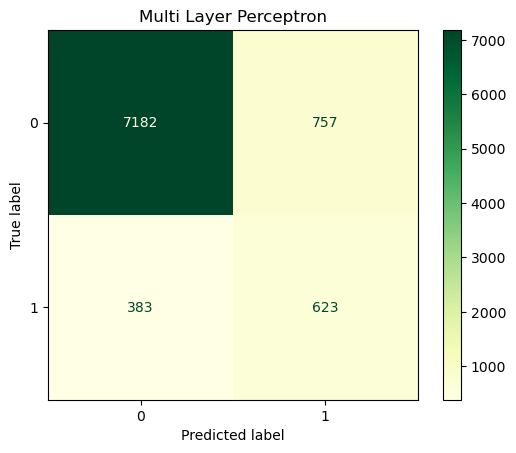

In [28]:
# Apply Multi Layer Perceptron
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

# Classification report
mlp_acc = classification_report(y_test, mlp_pred)
print(mlp_acc)

# Confusion Matrix
mlp_cm = confusion_matrix(y_test, mlp_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm)
disp.plot(cmap="YlGn", colorbar=True)
plt.title('Multi Layer Perceptron')
plt.show()

# 6. SMOTE Analysis

- Now SMOTE analysis is applied to handle imbalanced data. Here, SMOTE analysis is applied after data splitting to prevent data leakage.

In [29]:
# Apply SMOTE Analysis
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

## a. Logistic Regression

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7939
           1       0.83      0.87      0.85      7939

    accuracy                           0.84     15878
   macro avg       0.84      0.84      0.84     15878
weighted avg       0.84      0.84      0.84     15878



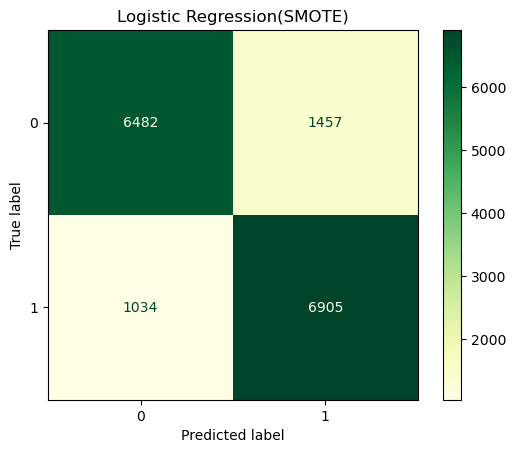

In [30]:
# Apply Logitic Regression after SMOTE
lr = LogisticRegression(random_state=0)
lr.fit(X_train_smote, y_train_smote)
lr_pred_smote = lr.predict(X_test_smote)

# Classification report after SMOTE
lr_acc_smote = classification_report(y_test_smote, lr_pred_smote)
print(lr_acc_smote)

# Confusion Matrix after SMOTE
lr_cm_smote = confusion_matrix(y_test_smote, lr_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm_smote)
disp.plot(cmap="YlGn", colorbar=True)
plt.title('Logistic Regression(SMOTE)')
plt.show()

## b. Decision Tree

              precision    recall  f1-score   support

           0       0.75      0.90      0.82      7939
           1       0.87      0.70      0.78      7939

    accuracy                           0.80     15878
   macro avg       0.81      0.80      0.80     15878
weighted avg       0.81      0.80      0.80     15878



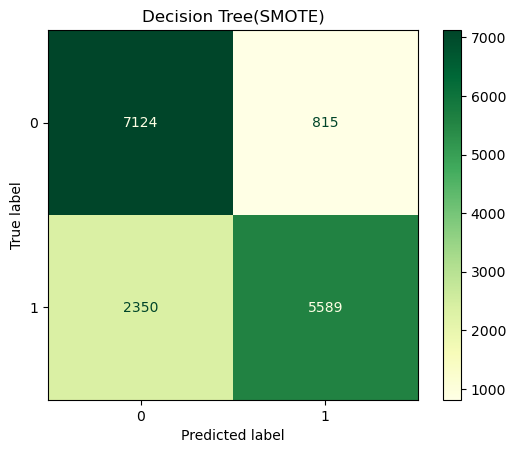

In [31]:
# Apply Decision Tree after SMOTE
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_smote, y_train_smote)
dt_pred_smote = dt.predict(X_test_smote)

# Classification report after SMOTE
dt_acc_smote = classification_report(y_test_smote, dt_pred_smote)
print(dt_acc_smote)

# Confusion Matrix after SMOTE
dt_cm_smote = confusion_matrix(y_test_smote, dt_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm_smote)
disp.plot(cmap="YlGn", colorbar=True)
plt.title('Decision Tree(SMOTE)')
plt.show()

## c. Gradient Boosting

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7939
           1       0.86      0.89      0.87      7939

    accuracy                           0.87     15878
   macro avg       0.87      0.87      0.87     15878
weighted avg       0.87      0.87      0.87     15878



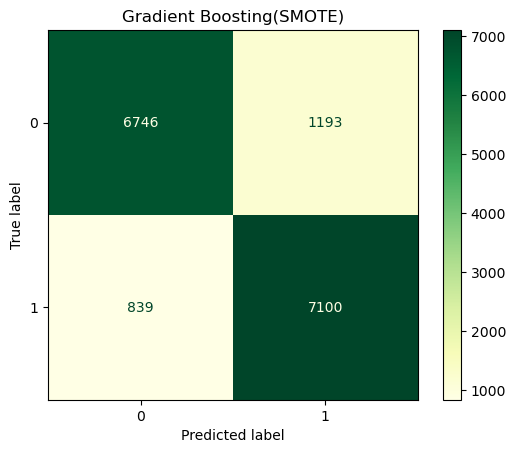

In [32]:
# Apply Gradient Boosting afte SMOTE
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train_smote, y_train_smote)
gb_pred_smote = gb.predict(X_test_smote)

# Classification report after SMOTE
gb_acc_smote = classification_report(y_test_smote, gb_pred_smote)
print(gb_acc_smote)

# Confusion Matrix after SMOTE
gb_cm_smote = confusion_matrix(y_test_smote, gb_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=gb_cm_smote)
disp.plot(cmap="YlGn", colorbar=True)
plt.title('Gradient Boosting(SMOTE)')
plt.show()

## d. Multi Layer Perceptron

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7939
           1       0.80      0.93      0.86      7939

    accuracy                           0.85     15878
   macro avg       0.86      0.85      0.85     15878
weighted avg       0.86      0.85      0.85     15878



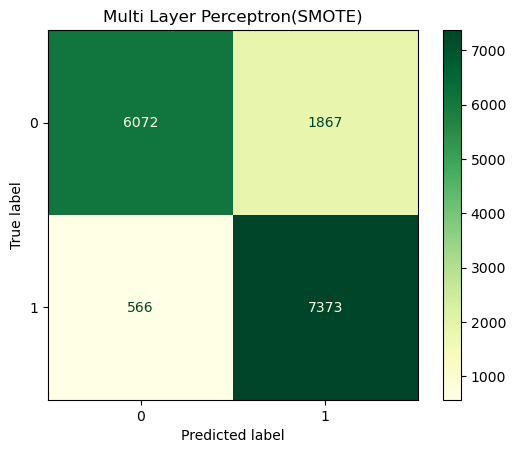

In [33]:
# Apply Multi Layer Perceptron after SMOTE
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_smote, y_train_smote)
mlp_pred_smote = mlp.predict(X_test_smote)

# Classification report after SMOTE
mlp_acc_smote = classification_report(y_test_smote, mlp_pred_smote)
print(mlp_acc_smote)

# Confusion Matrix after SMOTE
mlp_cm_smote = confusion_matrix(y_test_smote, mlp_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm_smote)
disp.plot(cmap="YlGn", colorbar=True)
plt.title('Multi Layer Perceptron(SMOTE)')
plt.show()

# 7. Result

**Before SMOTE**:

- Logistic Regression (LR): 89%
- Decision Tree (DT): 88%
- Gradient Boosting (GB): 91%
- Multilayer Perceptron (MLP): 87%

**After SMOTE**:

- Logistic Regression (LR): 84%
- Decision Tree (DT): 80%
- Gradient Boosting (GB): 87%
- Multilayer Perceptron (MLP): 84%

**Conculsion**:
- Before SMOTE, the model achieved high accuracy, but this is biased towards the majority class(no). This is noticed using the F1 score of the model. For all these 4 model F1 score is high for 0 and low for 1 which directly indicates that our models are biased towards the majority class.
- So we applied SMOTE to balance the data by oversampling the minority class. Here for all 4 models f1 score for both categories is almost the same.


- After the SMOTE analysis, it is concluded that gradient boosting is best model among all the models with the highest accuracy of 87% followed by MLP and Logistic regression.